___

<a href='http://www.dourthe.tech'> <img src='Dourthe_Technologies_Headers.png' /></a>
___
<center><em>For more information, visit <a href='http://www.dourthe.tech'>www.dourthe.tech</a></em></center>

# Automated Face Detection using Haar Cascades

___
## Objective
Build a function enabling the automated detection of faces on images and videos using the fonctionality of Haar cascades.

___
## Background
Object Detection using Haar feature-based cascade classifiers is an effective object detection method proposed by Paul Viola and Michael Jones in their paper, “Rapid Object Detection using a Boosted Cascade of Simple Features” in 2001. It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. It is then used to detect objects in other images.

_For more details on Haar cascades, visit https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html_

___
## Function preview
The function will apply the Haar cascade method to the image and draw a rectangle around the location of each detected face(s). For video files, it will be applied to each frame.

**In the code below, we show how to run the cascade face detection function on single and group photos, as well as on imported video files and on live webcam feed.**

**Example on single person**
<img src="img/example_single.jpg" alt="Drawing" style="width: 500px;"/>

**Example on group photo**
<img src="img/example_group.jpg" alt="Drawing" style="width: 500px;"/>

**Example on video file (screenshot)**
<img src="img/example_video.jpg" alt="Drawing" style="width: 500px;"/>

___
## Libraries Imports
### Data manipulation and analysis

In [1]:
import os
import numpy as np

### Data visualization

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

### Computer vision

In [3]:
import cv2

___
## Data Import and Visualization
**There are two subfolders in the main _data_ folder:**

* single: contains 10 portrait images of young women and men
* group: contains 10 group photos

We will start by creating two lists containing the filenames of all images contained in these two subfolders.

In [5]:
single = os.listdir('data/single')
group = os.listdir('data/group')

**Let's read and display the first image of each subfolder.**

Note that using the _imshow_ method from the cv2 library require to open a separate window. In order to visualize the image within the notebook, we will use _imshow_ method from matplotlib instead.

However, since cv2 reads image with a Blue, Green, Red (BGR) color convention, we need to use the cvtColor method from cv2 to convert the color channels from BGR to Red, Green, Blue (RGB).

In [6]:
single_img = cv2.imread('data/single/' + single[0])
group_img = cv2.imread('data/group/' + group[0])

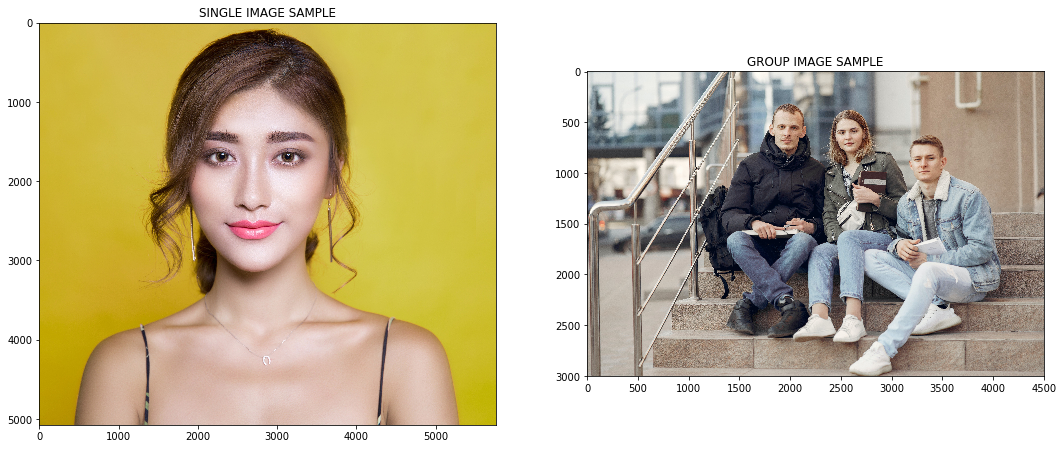

In [10]:
plt.figure(figsize=(18,10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(single_img, cv2.COLOR_BGR2RGB))
plt.title('SINGLE IMAGE SAMPLE')
plt.subplot(122)
plt.imshow(cv2.cvtColor(group_img, cv2.COLOR_BGR2RGB))
plt.title('GROUP IMAGE SAMPLE')
plt.show()

___
## Haar Cascade Face Detection
### Cascade files import
**First, we need to import the pre-trained cascade files (.xml format) that will be used to detect faces.**

Let's start by creating a list containing the filenames of all available cascade files in the _haar-cascades_ folder.

In [12]:
cascades = os.listdir('haar-cascades/')

In [14]:
cascades

['haarcascade_eye.xml',
 'haarcascade_eye_tree_eyeglasses.xml',
 'haarcascade_frontalcatface.xml',
 'haarcascade_frontalcatface_extended.xml',
 'haarcascade_frontalface_alt.xml',
 'haarcascade_frontalface_alt2.xml',
 'haarcascade_frontalface_alt_tree.xml',
 'haarcascade_frontalface_default.xml',
 'haarcascade_fullbody.xml',
 'haarcascade_lefteye_2splits.xml',
 'haarcascade_licence_plate_rus_16stages.xml',
 'haarcascade_lowerbody.xml',
 'haarcascade_profileface.xml',
 'haarcascade_righteye_2splits.xml',
 'haarcascade_russian_plate_number.xml',
 'haarcascade_smile.xml',
 'haarcascade_upperbody.xml']

**In the context of frontal face detection, we will use the pre-trained _haarhaarcascade_frontalface_default.xml_ file.**

Note that this specifc cascade may not work as well on faces that are not directly facing the camera.

In [15]:
face_cascade = cv2.CascadeClassifier('haar-cascades/haarcascade_frontalface_default.xml')

### Define face detection function
**Now, let's create a function that will apply the Haar cascade face detection model and draw a rectangle on the image that indicates where the model detected a face.**

In [38]:
def cascade_face_detection(img):
    
    img_copy = img.copy()
  
    face_rects = face_cascade.detectMultiScale(img_copy, scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(img_copy, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return img_copy

### Apply function and display result
**Let's apply the cascade_face_detection function to a random image from the _single_ subfolder.**

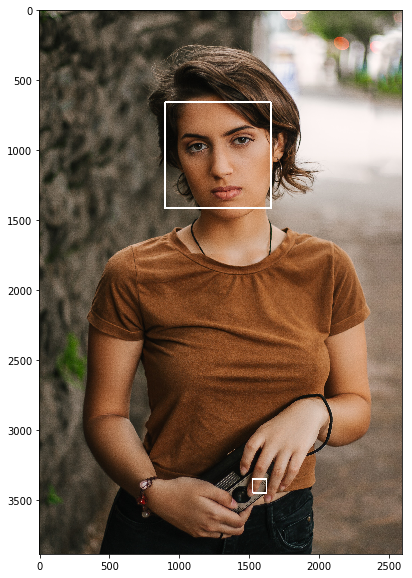

In [45]:
rand_idx = np.random.randint(0, len(single))
img = cv2.imread('data/single/' + single[rand_idx])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

single_test = cascade_face_detection(img)

plt.figure(figsize=(12,10))
plt.imshow(single_test)
plt.show()

Note that the function detected a face where her left index finger is. To improve the performance of the model, feel free to adjust the _scaleFactor_ and _minNeighbors_ parameters of the cascade_face_detection function.

**Now, let's try it on a random image from the _group_ subfolder.**

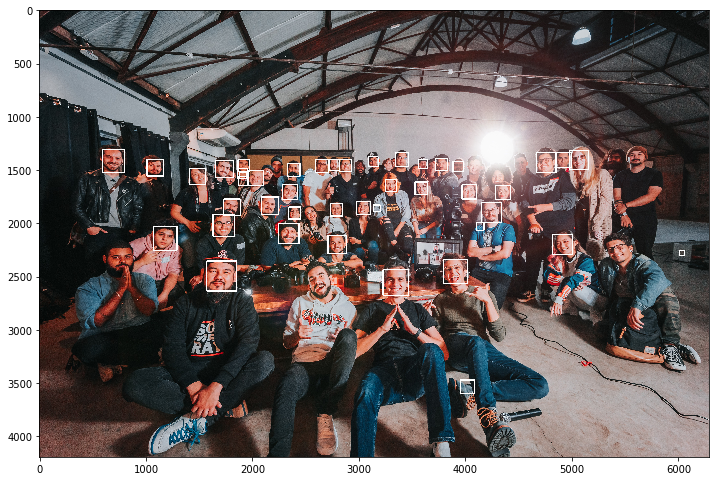

In [54]:
rand_idx = np.random.randint(0, len(group))
img = cv2.imread('data/group/' + group[rand_idx])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

group_test = cascade_face_detection(img)

plt.figure(figsize=(12,10))
plt.imshow(group_test)
plt.show()

### Test on imported video
**Let's try to load a random video of people walking and apply the cascade_face_detection function to display the live face dectection functionality of the Haar cascade method.**

First, we will import the video and define resizing parameters to ensure the full video can be seen on a laptop screen when displayed.

In [35]:
cap = cv2.VideoCapture('data/video/Video Of People Walking.mp4')

# Define resize ratio as a percentage of the original size
resize_ratio = 70
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) * resize_ratio / 100)
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) * resize_ratio / 100)
dim = (width, height)

**Display video with live cascade face detection.**

To exit the window and stop the live feed, press the 'Esc' key.

In [36]:
while True: 
    
    ret, frame = cap.read(0) 
     
    frame = cv2.resize(cascade_face_detection(frame), dim, interpolation = cv2.INTER_AREA)
 
    cv2.imshow('Live Haar Cascade Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

### Test on live video
**Here, we will create a function that turns on your local webcam and displays the live feedback on on seperate window. We will also apply the cascade_face_detection to that video feed to show the live face detection functionality of the Haar cascade face detection method.**

To exit the window and stop the live feed, press the 'Esc' key.

In [20]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = cascade_face_detection(frame)
 
    cv2.imshow('Live Haar Cascade Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()